In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from sklearn.model_selection import train_test_split

plt.rcParams["figure.figsize"] = (14,4)

In [4]:
empty = pd.read_csv('empty_no_ceiling.csv')
left_1 = pd.read_csv('deep_left_1m.csv')
left_05 = pd.read_csv('deep_left_05m.csv')
right_1 = pd.read_csv('deep_right_1m.csv')
right_05 = pd.read_csv('deep_right_05m.csv')

In [5]:
print(empty.shape)
print(left_1.shape)
print(left_05.shape)
print(right_1.shape)
print(right_05.shape)

(31, 161)
(66, 161)
(66, 161)
(66, 161)
(66, 161)


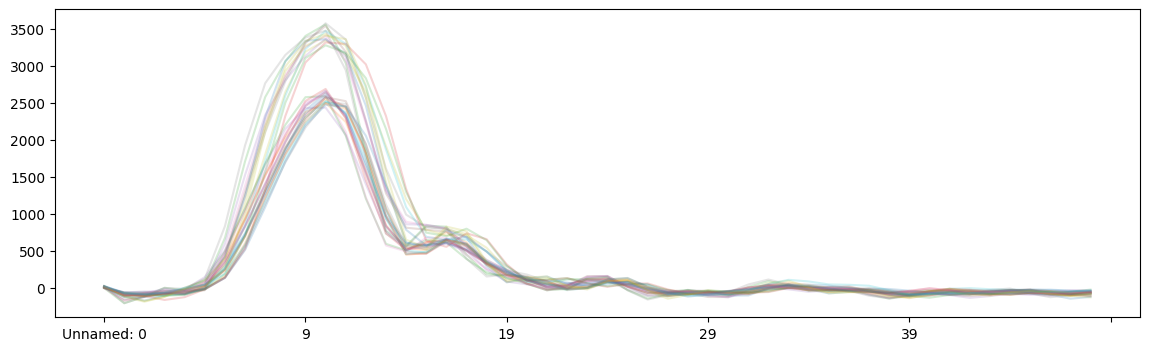

In [6]:
for i in range(len(empty)):
    empty.iloc[i][:50].plot(alpha=0.2)

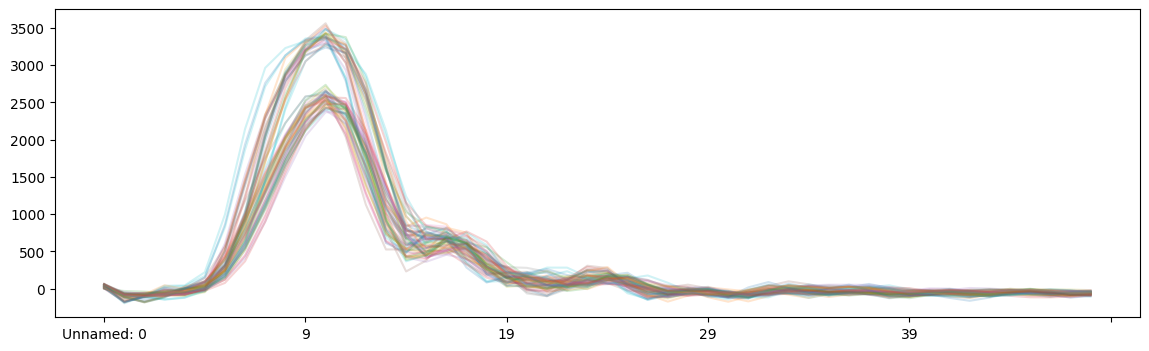

In [7]:
for i in range(len(left_1)):
    left_1.iloc[i][:50].plot(alpha=0.2)

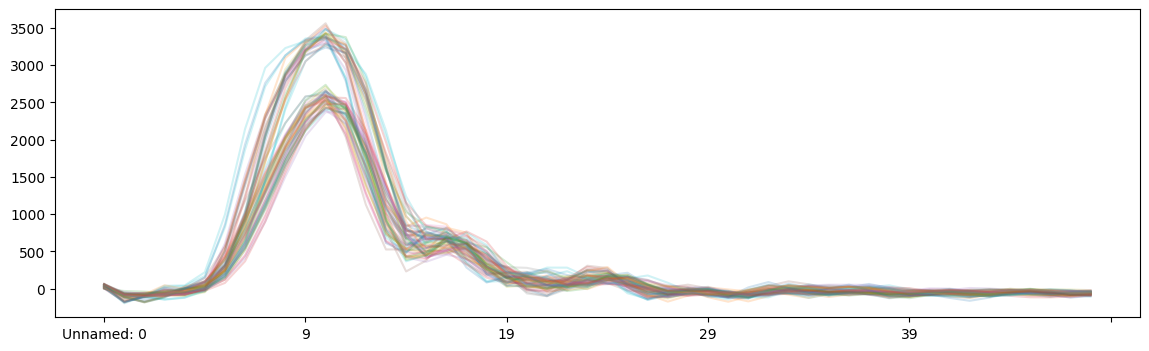

In [8]:
for i in range(len(left_1)):
    left_05.iloc[i][:50].plot(alpha=0.2)

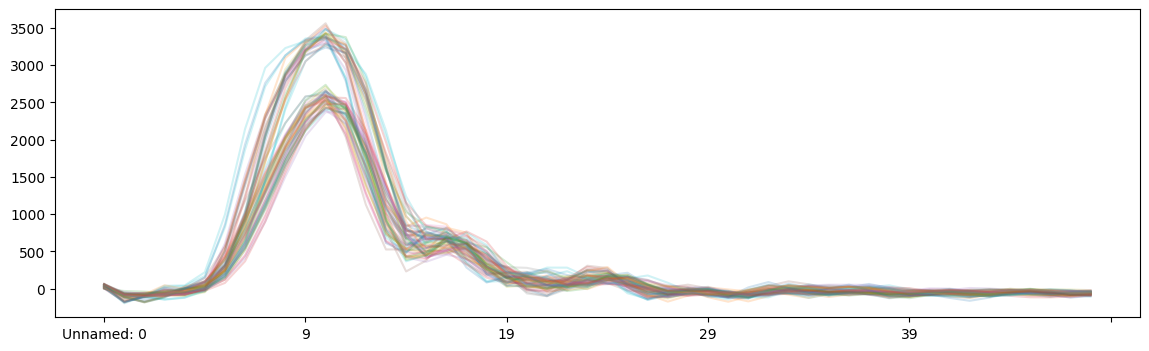

In [9]:
for i in range(len(right_1)):
    right_1.iloc[i][:50].plot(alpha=0.2)

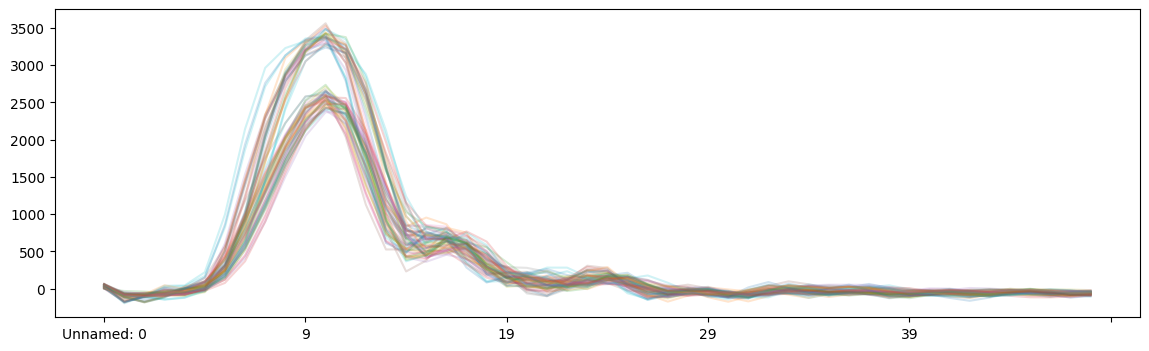

In [10]:
for i in range(len(right_05)):
    right_05.iloc[i][:50].plot(alpha=0.2)

In [26]:
x = pd.concat([empty, left_1, left_05, right_1, right_05])
y = [0]*len(empty) + [1]*len(left_1) + [2]*len(left_05) + [3]*len(right_1) + [4]*len(right_05)

# TRAIN: TEST = 8: 2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
print("x_train: ", len(x_train), "x_test: ", len(x_test), "y_train: ", len(y_train), "y_test: ", len(y_test))

x_train:  236 x_test:  59 y_train:  236 y_test:  59


In [ ]:
# 데이터 차원을 맞추기 위해 차원 추가
x_train = np.expand_dims(x_train, axis=-1)
y_train = to_categorical(y_train)
x_test = np.expand_dims(x_test, axis=-1)
y_test = to_categorical(y_test)

In [34]:
model = models.Sequential()
model.add(layers.Conv1D(10, 4, activation='relu', input_shape=(161,1)))
model.add(layers.Conv1D(15, 5, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(20, 5, activation='relu'))
model.add(layers.MaxPool1D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(5, activation='softmax')) 
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)  # overfitting을 방지하기 위해 early stopping을 사용

# 학습
history = model.fit(x_train, y_train, epochs=500, validation_data=(x_test, y_test),verbose=1)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)               │ (None, 158, 10)        │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 154, 15)        │           765 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 154, 15)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 150, 20)        │         1,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 75, 20)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │         7,505 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,840 (38.44 KB)

 Trainable params: 9,840 (38.44 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.1635 - loss: 109.1413 - val_accuracy: 0.2203 - val_loss: 39.8031
Epoch 2/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2783 - loss: 54.5348 - val_accuracy: 0.2034 - val_loss: 29.7743
Epoch 3/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2351 - loss: 40.7638 - val_accuracy: 0.1864 - val_loss: 13.7793
Epoch 4/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2765 - loss: 26.4132 - val_accuracy: 0.1695 - val_loss: 12.0656
Epoch 5/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1952 - loss: 24.6931 - val_accuracy: 0.1695 - val_loss: 8.0802
Epoch 6/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2205 - loss: 21.4755 - val_accuracy: 0.1695 - val_loss: 10.2006
Epoch 7/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2599 - loss: 15.1221 - val_accuracy: 0.2034 - val_loss: 5.0526
Epoch 8/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2638 - loss: 12.5706 - val_accuracy: 0.1695 - va

In [10]:
x = pd.concat([empty, left_05, right_05])
y = [0]*len(empty) + [1]*len(left_05) + [2]*len(right_05)

# TRAIN: TEST = 8: 2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
print("x_train: ", len(x_train), "x_test: ", len(x_test), "y_train: ", len(y_train), "y_test: ", len(y_test))

x_train:  130 x_test:  33 y_train:  130 y_test:  33


In [11]:
# 데이터 차원을 맞추기 위해 차원 추가
x_train = np.expand_dims(x_train, axis=-1)
y_train = to_categorical(y_train)
x_test = np.expand_dims(x_test, axis=-1)
y_test = to_categorical(y_test)

In [13]:
model = models.Sequential()
model.add(layers.Conv1D(10, 4, activation='relu', input_shape=(161,1)))
model.add(layers.Conv1D(15, 5, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(20, 5, activation='relu'))
model.add(layers.MaxPool1D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(3, activation='softmax')) 
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)  # overfitting을 방지하기 위해 early stopping을 사용

# 학습
history = model.fit(x_train, y_train, epochs=500, validation_data=(x_test, y_test),verbose=1)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 158, 10)        │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 154, 15)        │           765 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 154, 15)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 150, 20)        │         1,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 75, 20)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,838 (26.71 KB)

 Trainable params: 6,838 (26.71 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.3766 - loss: 66.2331 - val_accuracy: 0.4242 - val_loss: 42.6691
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4118 - loss: 73.8725 - val_accuracy: 0.4242 - val_loss: 20.0895
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4388 - loss: 51.0060 - val_accuracy: 0.4242 - val_loss: 28.8309
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3798 - loss: 41.0063 - val_accuracy: 0.4242 - val_loss: 34.7250
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4240 - loss: 48.2731 - val_accuracy: 0.5455 - val_loss: 4.4538
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4145 - loss: 27.9537 - val_accuracy: 0.3939 - val_loss: 29.5120
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3865 - loss: 35.9748 - val_accuracy: 0.4242 - val_loss: 24.8310
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4553 - loss: 34.4470 - val_accuracy: 0.4242 - va

I think, We have very small data, about each station.  
So first of all, I build the variance based model. And I will collecting more data.

In [56]:
empty_mean = empty.mean()
empty_variances = np.var(empty - empty_mean, axis=1)
for i in range(10):
    print(empty_variances[i])
print("variance mean: ", empty_variances.mean())

5949.177520465363
6019.570639101618
21410.413504804535
5397.386423454164
8638.757299349485
11457.537418641468
10931.268709382311
9111.062925318774
13020.973574439065
14008.39417536087
variance mean:  10955.559593108777


In [51]:
left_1_variance = np.var(left_1 - empty_mean, axis=1)
for i in range(10):
    print(left_1_variance[i])
print("variance mean: ", left_1_variance.mean())

11214.725380725025
11126.514939879204
10560.657192708542
11402.953726644242
11403.727626806622
7467.084559450461
9840.95276114074
13807.636842100312
13634.335462735891
26233.191897207074
variance mean:  11411.353569680203
